# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [8]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

2025-01-03 18:30:18,341: Host 0 é o servidor, não receberá qubits.
2025-01-03 18:30:18,342: Host 1 inicializado com 0 qubits.
2025-01-03 18:30:18,345: Host 2 inicializado com 0 qubits.
2025-01-03 18:30:18,346: Host 3 inicializado com 0 qubits.
2025-01-03 18:30:18,347: Host 4 inicializado com 0 qubits.
2025-01-03 18:30:18,355: Host 5 inicializado com 0 qubits.
2025-01-03 18:30:18,355: Host 6 inicializado com 0 qubits.
2025-01-03 18:30:18,356: Host 7 inicializado com 0 qubits.
2025-01-03 18:30:18,356: Host 8 inicializado com 0 qubits.
2025-01-03 18:30:18,357: Par EPR <quantumnet.objects.epr.Epr object at 0x7fde8a958610> adicionado ao canal.
2025-01-03 18:30:18,357: Par EPR <quantumnet.objects.epr.Epr object at 0x7fde8a980b50> adicionado ao canal.
2025-01-03 18:30:18,357: Par EPR <quantumnet.objects.epr.Epr object at 0x7fde8a95ac50> adicionado ao canal.
2025-01-03 18:30:18,358: Par EPR <quantumnet.objects.epr.Epr object at 0x7fde8a95abd0> adicionado ao canal.
2025-01-03 18:30:18,358: Par 

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


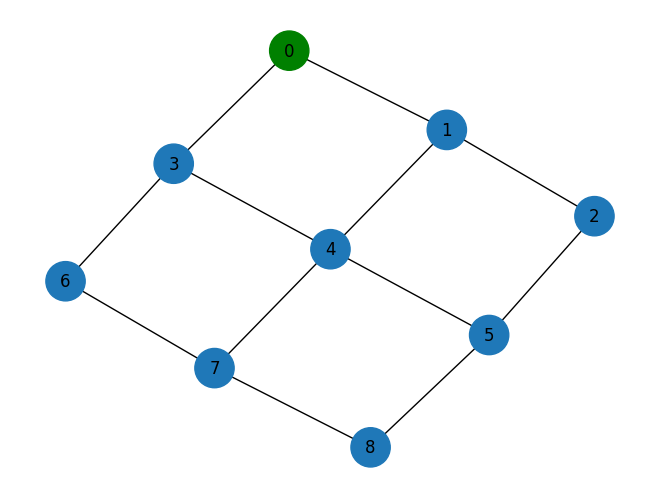

In [9]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

In [10]:

quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=10, num_gates=10)
ops_count= quantum_circuit.count_ops()
numero_de_operacoes = sum(ops_count.values())
print(numero_de_operacoes)
profundidade = quantum_circuit.depth()
#profundidade = 15
print(profundidade)

                       
q_0: ──────────────────
     ┌───┐             
q_1: ┤ T ├─────────────
     ├───┤┌───┐        
q_2: ┤ T ├┤ S ├──■─────
     └───┘└───┘  │     
q_3: ────────────┼───■─
                 │   │ 
q_4: ────────────┼───┼─
                 │   │ 
q_5: ────────────■───■─
          ┌───┐        
q_6: ──■──┤ X ├────────
       │  └───┘        
q_7: ──■───────────────
     ┌───┐┌───┐┌───┐   
q_8: ┤ X ├┤ S ├┤ X ├───
     └───┘└───┘└───┘   
q_9: ──────────────────
                       


2025-01-03 18:30:18,965: Circuito aleatório gerado com 10 qubits e 10 portas. Instruções sobre o circuito.
2025-01-03 18:30:18,973: Instrução: {'operation': 't', 'qubits': [2]}
2025-01-03 18:30:18,973: Instrução: {'operation': 'x', 'qubits': [8]}
2025-01-03 18:30:18,974: Instrução: {'operation': 's', 'qubits': [8]}
2025-01-03 18:30:18,975: Instrução: {'operation': 't', 'qubits': [1]}
2025-01-03 18:30:18,976: Instrução: {'operation': 's', 'qubits': [2]}
2025-01-03 18:30:18,976: Instrução: {'operation': 'cz', 'qubits': [7, 6]}
2025-01-03 18:30:18,977: Instrução: {'operation': 'cz', 'qubits': [5, 2]}
2025-01-03 18:30:18,977: Instrução: {'operation': 'x', 'qubits': [6]}
2025-01-03 18:30:18,986: Instrução: {'operation': 'cz', 'qubits': [5, 3]}
2025-01-03 18:30:18,988: Instrução: {'operation': 'x', 'qubits': [8]}


10
4


##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [11]:
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=num_qubits,scenario=2,profundidade=profundidade)

2025-01-03 18:30:19,113: Timeslot 0: Iniciando protocolo Andrew Childs entre Alice 6 e Bob 0.
2025-01-03 18:30:19,115: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2025-01-03 18:30:19,115: Limpando a memória do servidor (Bob) antes de iniciar o protocolo.
2025-01-03 18:30:19,117: Cliente criou 10 qubits para a transmissão.
2025-01-03 18:30:19,118: Qubit 802 registrado no timeslot 0
2025-01-03 18:30:19,119: Qubit 577 registrado no timeslot 0
2025-01-03 18:30:19,120: Qubit 817 registrado no timeslot 0
2025-01-03 18:30:19,120: Qubit 943 registrado no timeslot 0
2025-01-03 18:30:19,121: Qubit 560 registrado no timeslot 0
2025-01-03 18:30:19,122: Qubit 509 registrado no timeslot 0
2025-01-03 18:30:19,122: Qubit 578 registrado no timeslot 0
2025-01-03 18:30:19,123: Qubit 141 registrado no timeslot 0
2025-01-03 18:30:19,124: Qubit 637 registrado no timeslot 0
2025-01-03 18:30:19,124: Qubit 261 registrado no timeslot 0
2025-01-03 18:30:19,125: Qubit 802 criado pelo Clien

Tempo de Operação: 4


2025-01-03 18:30:19,712: Produto das fidelidades para rota [0, 3, 6]: 0.9703725093562656
2025-01-03 18:30:19,717: Fidelidade atual da rota: 0.9703725093562656
2025-01-03 18:30:19,723: Fidelidade final: 0.9704 (F_qubit: 0.8813 * F_rota: 0.9704)
2025-01-03 18:30:19,724: Fidelidade do EPR 0->3: 0.9801495006250001
2025-01-03 18:30:19,729: Fidelidade do EPR 3->6: 0.9801495006250001
2025-01-03 18:30:19,736: Produto das fidelidades para rota [0, 3, 6]: 0.960693043575437
2025-01-03 18:30:19,736: Fidelidade atual da rota: 0.960693043575437
2025-01-03 18:30:19,737: Fidelidade final: 0.9607 (F_qubit: 0.8153 * F_rota: 0.9607)
2025-01-03 18:30:19,741: Fidelidade do EPR 0->3: 0.9752487531218751
2025-01-03 18:30:19,742: Fidelidade do EPR 3->6: 0.9752487531218751
2025-01-03 18:30:19,748: Produto das fidelidades para rota [0, 3, 6]: 0.9511101304657721
2025-01-03 18:30:19,755: Fidelidade atual da rota: 0.9511101304657721
2025-01-03 18:30:19,756: Fidelidade final: 0.9511 (F_qubit: 0.8428 * F_rota: 0.9511

In [12]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9563


0.9562859120339084

In [13]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137


##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [14]:
quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=15, num_gates=30)
circuito, num_qubits = rede.generate_random_circuit(num_qubits=10, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=10, scenario=1)

                                       ┌───┐┌───┐      ┌───┐
 q_0: ───────────────X─────────────────┤ X ├┤ T ├─■──X─┤ Z ├
           ┌───┐     │            ┌───┐└─┬─┘├───┤ │  │ └───┘
 q_1: ─────┤ S ├─────┼─────────■──┤ Z ├──┼──┤ H ├─┼──┼──────
           └───┘     │         │  └───┘  │  └───┘ │  │      
 q_2: ───────────■───┼────■────┼─────────┼────────┼──┼──────
                 │   │    │    │         │        │  │      
 q_3: ───────────┼───┼────■────┼─────────┼────────┼──┼──────
                 │   │         │         │        │  │      
 q_4: ───────■───┼───┼─────────┼─────────┼────────┼──┼──────
      ┌───┐  │   │   │  ┌───┐  │  ┌───┐  │        │  │      
 q_5: ┤ H ├──┼───┼───┼──┤ Z ├──┼──┤ Z ├──┼────────┼──┼──────
      ├───┤  │   │   │  └───┘  │  └───┘  │        │  │      
 q_6: ┤ Y ├──┼───┼───┼─────────■─────────┼────────┼──┼──────
      ├───┤  │   │   │  ┌───┐            │        │  │      
 q_7: ┤ S ├──┼───┼───┼──┤ T ├────────────┼────────┼──┼──────
      └───┘  │   │   │  

2025-01-03 18:30:20,675: Circuito aleatório gerado com 15 qubits e 30 portas. Instruções sobre o circuito.
2025-01-03 18:30:20,688: Instrução: {'operation': 'h', 'qubits': [5]}
2025-01-03 18:30:20,698: Instrução: {'operation': 'z', 'qubits': [5]}
2025-01-03 18:30:20,699: Instrução: {'operation': 'cz', 'qubits': [11, 4]}
2025-01-03 18:30:20,701: Instrução: {'operation': 'cz', 'qubits': [11, 10]}
2025-01-03 18:30:20,702: Instrução: {'operation': 's', 'qubits': [7]}
2025-01-03 18:30:20,702: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-03 18:30:20,703: Instrução: {'operation': 'y', 'qubits': [6]}
2025-01-03 18:30:20,714: Instrução: {'operation': 's', 'qubits': [1]}
2025-01-03 18:30:20,715: Instrução: {'operation': 'cz', 'qubits': [6, 1]}
2025-01-03 18:30:20,719: Instrução: {'operation': 's', 'qubits': [12]}
2025-01-03 18:30:20,720: Instrução: {'operation': 'cx', 'qubits': [9, 11]}
2025-01-03 18:30:20,720: Instrução: {'operation': 'cz', 'qubits': [2, 14]}
2025-01-03 18:30:20,721: In

     ┌───┐┌───┐             ┌───┐                        ┌───┐
q_0: ┤ S ├┤ H ├──────X───X──┤ S ├────────────────────────┤ X ├
     ├───┤├───┤      │   │  └───┘                        └─┬─┘
q_1: ┤ T ├┤ S ├──────┼───┼─────────────────────────────────┼──
     └───┘└───┘┌───┐ │   │                                 │  
q_2: ───────■──┤ H ├─┼───X─────────────────────────────────┼──
            │  └───┘ │                      ┌───┐   ┌───┐  │  
q_3: ───────┼────────┼────────X────X──────X─┤ H ├─■─┤ Y ├──┼──
     ┌───┐  │  ┌───┐ │ ┌───┐  │    │      │ └───┘ │ └───┘  │  
q_4: ┤ Z ├──┼──┤ X ├─┼─┤ X ├──┼────┼──────┼───────┼────────┼──
     └───┘  │  └───┘ │ └───┘  │    │      │ ┌───┐ │        │  
q_5: ───────■────────┼────────┼────X───■──X─┤ X ├─┼────────┼──
     ┌───┐┌───┐      │        │        │    └───┘ │        │  
q_6: ┤ H ├┤ S ├──────┼────────┼────────┼──────────■────────■──
     └───┘├───┤      │        │        │                      
q_7: ─────┤ Z ├──────┼────────┼────────┼──X────────────

2025-01-03 18:30:20,975: Circuito aleatório gerado com 10 qubits e 30 portas. Instruções sobre o circuito.
2025-01-03 18:30:20,975: Instrução: {'operation': 'x', 'qubits': [9]}
2025-01-03 18:30:20,976: Instrução: {'operation': 's', 'qubits': [0]}
2025-01-03 18:30:20,976: Instrução: {'operation': 'x', 'qubits': [9]}
2025-01-03 18:30:20,978: Instrução: {'operation': 'z', 'qubits': [4]}
2025-01-03 18:30:20,979: Instrução: {'operation': 'h', 'qubits': [0]}
2025-01-03 18:30:20,980: Instrução: {'operation': 'swap', 'qubits': [0, 8]}
2025-01-03 18:30:20,981: Instrução: {'operation': 't', 'qubits': [1]}
2025-01-03 18:30:20,981: Instrução: {'operation': 'h', 'qubits': [6]}
2025-01-03 18:30:20,982: Instrução: {'operation': 'swap', 'qubits': [8, 3]}
2025-01-03 18:30:20,983: Instrução: {'operation': 'z', 'qubits': [9]}
2025-01-03 18:30:20,983: Instrução: {'operation': 'cz', 'qubits': [2, 5]}
2025-01-03 18:30:20,984: Instrução: {'operation': 'swap', 'qubits': [5, 3]}
2025-01-03 18:30:20,985: Instru

ValueError: too many values to unpack (expected 2)

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [ ]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9307


0.9306872317122018

##### Além de printar as fidelidades das rotas.

In [8]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9046
0.8956
0.8867
0.8778
0.8691
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9046
0.8956
0.8867
0.8778
0.8691
0.9397
0.8767
0.9036
0.9302


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [9]:
rede.get_total_useds_eprs()

2025-01-03 16:40:43,097: Eprs usados na camada LinkLayer: 0
2025-01-03 16:40:43,099: Eprs usados na camada NetworkLayer: 0
2025-01-03 16:40:43,099: Eprs usados na camada ApplicationLayer: 70


70